#  Movie Recommender System

## 1. Problem Statement

___

The aim of this project is to develop a content-based recommender system that recommends similar movies to a user's input, by analyzing textual features such as title, genre, description, keywords and credits.

### 📌  Content-based recommendation engine
A content-based recommendation engine is a subset of recommender systems that aims to infer the user's preferences in order to recommend items that are similar in content to items they have previously liked. Unlike collaborative recommendation systems, this approach does not require other user data to be able to give recommendation.

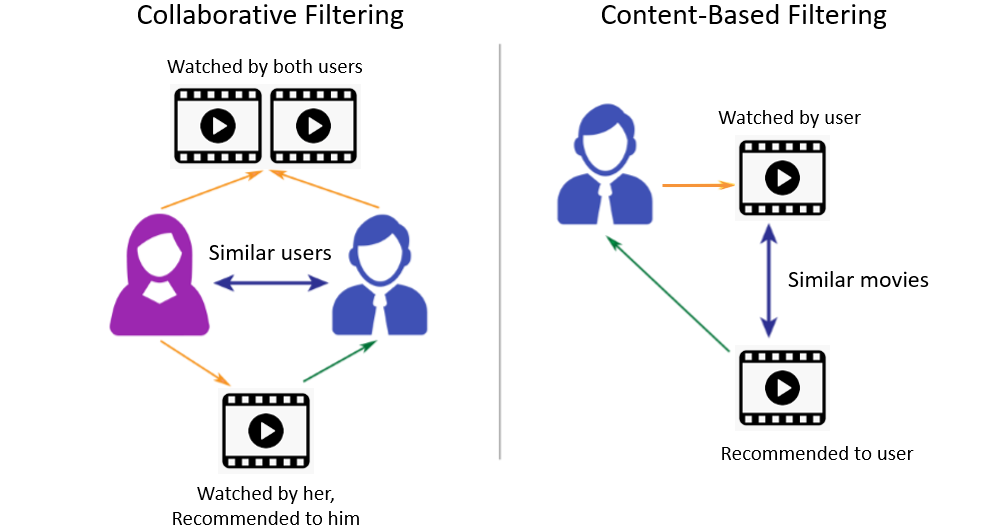

## 2. Data Import
___

For this project we fetch dataset from Kaggle’s “Movies Daily Update Dataset”. This dataset was made available through Akshay Pawar on Kaggle. This data is deemed credible as it operates under a public domain. The dataset contains metadata for more than 700,000 movies listed in the TMDB Dataset.

### Libraries needed

In [1]:
# libraries import
import numpy as np
import pandas as pd
import sklearn as sk
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Data Import

In [2]:
# data import
file_path = r"C:\Users\eunbi\Desktop\DS\mvrs\movies.csv"
movie = pd.read_csv(file_path)

## 3. Data Check and Analysis
___

Here are the first five rows of the dataset.

In [3]:
# first five rows of dataset
movie.head()

id                             title                            genres  \
0  823464   Godzilla x Kong: The New Empire  Science Fiction-Action-Adventure   
1  615656                 Meg 2: The Trench     Action-Science Fiction-Horror   
2  758323               The Pope's Exorcist           Horror-Mystery-Thriller   
3  667538  Transformers: Rise of the Beasts  Action-Adventure-Science Fiction   
4  693134                    Dune: Part Two         Science Fiction-Adventure   

  original_language                                           overview  \
0                en  Following their explosive showdown Godzilla an...   
1                en  An exploratory dive into the deepest depths of...   
2                en  Father Gabriele Amorth Chief Exorcist of the V...   
3                en  When a new threat capable of destroying the en...   
4                en  Follow the mythic journey of Paul Atreides as ...   

   popularity                               production_companies release_date  \
0   10484.676           Legendary Pictures-Warner Bros. Pictures   2024-03-27   
1    8763.998  Apelles Entertainment-Warner Bros. Pictures-di...   2023-08-02   
2    5953.227  Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...   2023-04-05   
3    5409.104  Skydance-Paramount-di Bonaventura Pictures-Bay...   2023-06-06   
4    4742.163                                 Legendary Pictures   2024-02-27   

        budget      revenue  runtime    status  \
0  150000000.0  558503759.0    115.0  Released   
1  129000000.0  352056482.0    116.0  Released   
2   18000000.0   65675816.0    103.0  Released   
3  200000000.0  407045464.0    127.0  Released   
4  190000000.0  683813734.0    167.0  Released   

                                             tagline  vote_average  \
0                       Rise together or fall alone.         7.246   
1                                  Back for seconds.         7.079   
2  Inspired by the actual files of Father Gabriel...         7.433   
3                                     Unite or fall.         7.340   
4                            Long live the fighters.         8.300   

   vote_count                                            credits  \
0      1878.0  Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...   
1      1365.0  Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...   
2       545.0  Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...   
3      1007.0  Anthony Ramos-Dominique Fishback-Luna Lauren V...   
4      2770.0  Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...   

                                            keywords  \
0  giant monster-sequel-dinosaur-kaiju-fantasy wo...   
1                based on novel or book-sequel-kaiju   
2  spain-rome italy-vatican-pope-pig-possession-c...   
3  peru-alien-end of the world-based on cartoon-b...   
4  epic-based on novel or book-fight-sandstorm-sa...   

                        poster_path                     backdrop_path  \
0  /v4uvGFAkKuYfyKLGZnYj6l47ERQ.jpg  /j3Z3XktmWB1VhsS8iXNcrR86PXi.jpg   
1  /4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg  /qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg   
2  /9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg  /hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg   
3  /gPbM0MK8CP8A174rmUwGsADNYKD.jpg  /woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg   
4  /czembW0Rk1Ke7lCJGahbOhdCuhV.jpg  /xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg   

                                     recommendations  
0  1011985-1275232-359410-601796-967847-653346-69...  
1  1006462-298618-569094-1061181-346698-1076487-6...  
2  713704-296271-502356-1076605-1084225-1008005-9...  
3  496450-569094-298618-385687-877100-598331-4628...  
4  438631-763215-792307-1011985-467244-634492-359...

### How many movies and features are given in our data?

In [4]:
# shape of dataset
print(movie.shape)

(722444, 20)


* We have about 728K movies in the dataset and about 20 features of each movies.

### Data-types and names of features of movies

In [5]:
# column names and data tyles
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722444 entries, 0 to 722443
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722444 non-null  int64  
 1   title                 722440 non-null  object 
 2   genres                511992 non-null  object 
 3   original_language     722444 non-null  object 
 4   overview              604118 non-null  object 
 5   popularity            722444 non-null  float64
 6   production_companies  337285 non-null  object 
 7   release_date          670657 non-null  object 
 8   budget                722444 non-null  float64
 9   revenue               722444 non-null  float64
 10  runtime               688084 non-null  float64
 11  status                722444 non-null  object 
 12  tagline               108359 non-null  object 
 13  vote_average          722444 non-null  float64
 14  vote_count            722444 non-null  float64
 15  

* The dataset mainly consists of text data.

### Check missing values and duplicates in dataset

In [6]:
# null values
movie.isna().sum()

id                           0
title                        4
genres                  210452
original_language            0
overview                118326
popularity                   0
production_companies    385159
release_date             51787
budget                       0
revenue                      0
runtime                  34360
status                       0
tagline                 614085
vote_average                 0
vote_count                   0
credits                 224823
keywords                511949
poster_path             184684
backdrop_path           499475
recommendations         687265
dtype: int64

In [7]:
# duplicates
movie.duplicated().sum()

1

* We can see there are a lot of missing valuess.
* We can also see that there are one duiplicated value.

## 4. Data cleaning
___

### Drop unncessary columns

Unnecssary columns will be dropped except for the features which define the movie best, such as movie Id, title, genre, overview, credit, keyword and vote count. These features wil be the base features for our model.

In [8]:
# drop unnecessary columns
movie = movie.drop(["production_companies", "popularity", "budget", "revenue", "status", 
                    "recommendations", "runtime", "vote_average", "backdrop_path", "tagline"], axis=1)

### Dropping duplicates

We will drop the driplicates in whole dataset and those with same titles and release date.

In [9]:
# drop the driplicates in whole dataset
movie.drop_duplicates(inplace = True)

In [10]:
# check duplicates in titles
movie.title.duplicated().sum()

87010

In [11]:
# check if duplicated titles have same release date 
movie[['title', 'release_date']].duplicated().sum()

2204

In [12]:
# get rid of duplicated titles with same release date
movie.drop_duplicates(subset = ["title","release_date"], inplace=True)

### Droping all the movies whoes vote_count < 350

By adopting this approach, we will significantly reduce the number of movies in our dataset by half. This simplification of our model not only improve its performance but also ensures a more efficient data transfer to other platforms, thanks to the smaller size of the dataset.

In [13]:
movie = movie[movie.vote_count >= 350].reset_index()

In [14]:
movie.isnull().sum()

index                  0
id                     0
title                  0
genres                 0
original_language      0
overview               1
release_date           0
vote_count             0
credits                8
keywords             241
poster_path            0
dtype: int64

In [15]:
# replacing all the null value from genres adn overview with "nothing"
movie.fillna("", inplace = True)

### Drop movies with no genres and overview

Movie with no Overview data will be dropped as well. Genre and Overview are most important features to have for our prediction model and the movies missing these values are no use for us. 

In [16]:
index = movie[(movie.genres == "") & (movie.overview == "")].index
movie.drop(index, inplace=True)

In [17]:
movie.shape

(7720, 11)

### Remove "-" sign from Genre, Keywords and Credits

In [18]:
# replacing genres, credits and keywords - with " " (empty strings)
movie.genres = movie.genres.apply(lambda x: " ".join(x.split("-")))
movie.keywords = movie.keywords.apply(lambda x: " ".join(x.split("-")))
movie.credits = movie.credits.apply(lambda x: " ".join(x.split("-")))

In [19]:
movie[['genres', 'keywords', 'credits']].head()

genres  \
0  Science Fiction Action Adventure   
1     Action Science Fiction Horror   
2           Horror Mystery Thriller   
3  Action Adventure Science Fiction   
4         Science Fiction Adventure   

                                            keywords  \
0  giant monster sequel dinosaur kaiju fantasy wo...   
1                based on novel or book sequel kaiju   
2  spain rome italy vatican pope pig possession c...   
3  peru alien end of the world based on cartoon b...   
4  epic based on novel or book fight sandstorm sa...   

                                             credits  
0  Rebecca Hall Brian Tyree Henry Dan Stevens Kay...  
1  Jason Statham Wu Jing Shuya Sophia Cai Sergio ...  
2  Russell Crowe Daniel Zovatto Alex Essoe Franco...  
3  Anthony Ramos Dominique Fishback Luna Lauren V...  
4  Timothée Chalamet Zendaya Rebecca Ferguson Jav...

## 5. Feature selection
___

### Tag

To predict similar movies using natural language processing techniques, we will utilize text-based data as input for our machine learning model. To facilitate this process, we will create a new column called "Tags" that encompasses all the crucial text features such as Overview, Genres, Keywords, and Original Language. This will enable us to make accurate predictions of similar movies.

In [21]:
# create a new column 'tag'
movie["tag"] = movie["overview"] + " " + movie["genres"] + " " + movie["keywords"] + " " + movie["credits"] + " " + movie["original_language"]

In [22]:
# make new framework for important features
movie_new = movie[["id", "title", "tag", 'poster_path']]
movie_new.shape

(7720, 4)

In [23]:
movie_new.head()

id                             title  \
0  823464   Godzilla x Kong: The New Empire   
1  615656                 Meg 2: The Trench   
2  758323               The Pope's Exorcist   
3  667538  Transformers: Rise of the Beasts   
4  693134                    Dune: Part Two   

                                                 tag  \
0  Following their explosive showdown Godzilla an...   
1  An exploratory dive into the deepest depths of...   
2  Father Gabriele Amorth Chief Exorcist of the V...   
3  When a new threat capable of destroying the en...   
4  Follow the mythic journey of Paul Atreides as ...   

                        poster_path  
0  /v4uvGFAkKuYfyKLGZnYj6l47ERQ.jpg  
1  /4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg  
2  /9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg  
3  /gPbM0MK8CP8A174rmUwGsADNYKD.jpg  
4  /czembW0Rk1Ke7lCJGahbOhdCuhV.jpg

### Convert the text values to lower case form

In [22]:
# convert to lower case form
movie_new = movie_new.copy()
movie_new.tag = movie_new.tag.apply(lambda x: x.lower())

In [23]:
movie_new.tag[0]

'following their explosive showdown godzilla and kong must reunite against a colossal undiscovered threat hidden within our world challenging their very existence – and our own. science fiction action adventure giant monster sequel dinosaur kaiju fantasy world giant ape godzilla king kong mongkey rebecca hall brian tyree henry dan stevens kaylee hottle alex ferns fala chen rachel house ron smyck chantelle jamieson greg hatton kevin copeland tess dobre tim carroll anthony brandon wong sophia emberson bain chika ikogwe vincent b. gorce yeye zhou jamaliah othman nick lawler jordy campbell cassie riley robert clavero patrick moroney en'

### Final dataset

Here are the first five rows of our final dataset.

In [24]:
movie_new.head()

id                             title  \
0  823464   Godzilla x Kong: The New Empire   
1  615656                 Meg 2: The Trench   
2  758323               The Pope's Exorcist   
3  667538  Transformers: Rise of the Beasts   
4  693134                    Dune: Part Two   

                                                 tag  \
0  following their explosive showdown godzilla an...   
1  an exploratory dive into the deepest depths of...   
2  father gabriele amorth chief exorcist of the v...   
3  when a new threat capable of destroying the en...   
4  follow the mythic journey of paul atreides as ...   

                        poster_path  
0  /v4uvGFAkKuYfyKLGZnYj6l47ERQ.jpg  
1  /4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg  
2  /9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg  
3  /gPbM0MK8CP8A174rmUwGsADNYKD.jpg  
4  /czembW0Rk1Ke7lCJGahbOhdCuhV.jpg

## 6. Vectorizer
---

### Stemming

📌   Stemming is the process of reducing words to their base or root form. This is done by removing suffixes, prefixes, or inflections from words to obtain their stem (for example word actors turn into actor). The goal of stemming is to reduce words to their core form, so that words with the same root can be recognized as the same word, regardless of their grammatical form. This can be useful in text-based natural language processing tasks, such as text classification, information retrieval, and machine translation. Basically, It is used to neutralize grammer of tags.

For stemming, we use nltk library and PorterStemmer.

In [25]:
# porter modile
ps = PorterStemmer()

In [26]:
# define stem function to take text and give output
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y)    

In [27]:
# apply stem function to text
movie_new.tag = movie_new.tag.apply(stem)

In [28]:
movie_new.tag[0]

'follow their explos showdown godzilla and kong must reunit against a coloss undiscov threat hidden within our world challeng their veri exist – and our own. scienc fiction action adventur giant monster sequel dinosaur kaiju fantasi world giant ape godzilla king kong mongkey rebecca hall brian tyre henri dan steven kayle hottl alex fern fala chen rachel hous ron smyck chantel jamieson greg hatton kevin copeland tess dobr tim carrol anthoni brandon wong sophia emberson bain chika ikogw vincent b. gorc yey zhou jamaliah othman nick lawler jordi campbel cassi riley robert clavero patrick moroney en'

### Text vectorization

📌   Text vectorization is the process of converting text data into numerical vectors so that they can be used as input for machine learning models.

We will be using text vectorizer for this task which will convert our text data into number. Text vectorizer also helps to eliminate stop words. It will also be used to make "bag-of-word" with 5000 most repeated words as well which is also start of our model building. For text vectorization, we use CountVectorizer from scikit-learn library.

In [45]:
# set for 5000 most repeated words, and exclude stop words
cv = CountVectorizer(stop_words = 'english', max_features = 5000)

In [46]:
# fit tags in count vector and change it to array to use
vectors = cv.fit_transform(movie_new['tag']).toarray()

In [47]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
cv.get_feature_names_out()[60:65]

array(['addison', 'adel', 'adkin', 'adler', 'adolesc'], dtype=object)

In [49]:
movie_new.head()

id                             title  \
0  823464   Godzilla x Kong: The New Empire   
1  615656                 Meg 2: The Trench   
2  758323               The Pope's Exorcist   
3  667538  Transformers: Rise of the Beasts   
4  693134                    Dune: Part Two   

                                                 tag  \
0  follow their explos showdown godzilla and kong...   
1  an exploratori dive into the deepest depth of ...   
2  father gabriel amorth chief exorcist of the va...   
3  when a new threat capabl of destroy the entir ...   
4  follow the mythic journey of paul atreid as he...   

                        poster_path  
0  /v4uvGFAkKuYfyKLGZnYj6l47ERQ.jpg  
1  /4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg  
2  /9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg  
3  /gPbM0MK8CP8A174rmUwGsADNYKD.jpg  
4  /czembW0Rk1Ke7lCJGahbOhdCuhV.jpg

## 7. Model building and testing
---

For this project's machine learning model, cosine similarity model will be used to build a recommender system algorithm. We use cosine_similarity from scikit-learn library.

### Cosine Similarity

📌  Cosine Similarity is a process of creating a machine learning model that utilizes the cosine similarity metric to determine the similarity between two pieces of text. This step involves calculating the cosine similarity between all pairs of vectors in the dataset. The similarity value will range between -1 to 1, 1 being exactly similar and -1 being completely dissimilar.

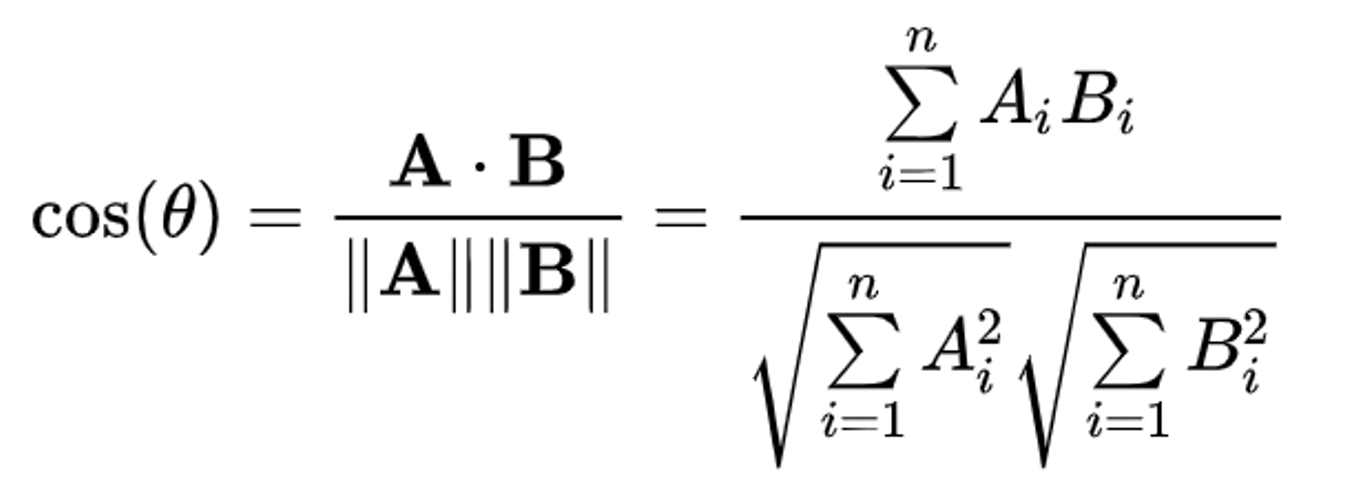

In [50]:
# calculate similarity of each movie with all movies
similarity = cosine_similarity(vectors)

In [51]:
# similarity of each movie with all the movies
similarity.shape

(7720, 7720)

In [52]:
similarity

array([[1.        , 0.12001372, 0.07132675, ..., 0.05698029, 0.        ,
        0.05466134],
       [0.12001372, 1.        , 0.04622502, ..., 0.06154575, 0.02631123,
        0.04428074],
       [0.07132675, 0.04622502, 1.        , ..., 0.03413944, 0.03283841,
        0.02456254],
       ...,
       [0.05698029, 0.06154575, 0.03413944, ..., 1.        , 0.0437223 ,
        0.0327035 ],
       [0.        , 0.02631123, 0.03283841, ..., 0.0437223 , 1.        ,
        0.19922886],
       [0.05466134, 0.04428074, 0.02456254, ..., 0.0327035 , 0.19922886,
        1.        ]])

Now, we will make a function which will take name of a movie and return a recommendation of 5 similar movies.

In [53]:
# make function to find movie and give similar movies as return
def recommend_movies(movie):
    movie_index = movie_new[movie_new.title == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse = True, key = lambda x:x[1])[1:6]
    
    for i in movies_list:
        print(movie_new.iloc[i[0]].title)

### Testing model

In [54]:
# checking similar movies test 1
recommend_movies("Batman")

The Dark Knight
Batman & Robin
Gotti
Batman Returns
Dick Tracy


In [55]:
# test 2
recommend_movies("Batman")

The Dark Knight
Batman & Robin
Gotti
Batman Returns
Dick Tracy


The function is returning 5 movies that are similar to the input. Our model building seems successfull.

## 8. Deployment
---

In [35]:
# import Pickle
# import pickle

In [ ]:
# pickle.dump(movie_new, open('movies.pkl', 'wb'))

In [36]:
# pickle.dump(movie, open('movies_df.pkl', 'wb'))

In [ ]:
# pickle.dump(similarity, open('similarity.pkl', 'wb'))

The bellow is the python code I used to deploy my model in streamlit.

### Code

In [ ]:
"""
# import libraries
import streamlit as st
import pickle


# import files
movies = pickle.load(open('movies.pkl', 'rb'))
similarity = pickle.load(open('similarity.pkl', 'rb'))
movies_list = movies['title'].values


# create title for stream lit page
st.header('Movie Recommender System')


# create a input box for a movie name
selected_movie = st.selectbox('What is the title of the movie?', movies_list)


# movie recommender algorithm
def recommend(movie):
    movie_index = movies[movies["title"] == movie].index[0]
    distances = similarity[movie_index]
    sorted_movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    recommended_movies = []
    recommended_posters = []

    for i in sorted_movie_list:
        poster_path = movies["poster_path"][i[0]]
        recommended_movies.append(movies.iloc[i[0]].title)
        recommended_posters.append("https://image.tmdb.org/t/p/original"+poster_path)

    return recommended_movies, recommended_posters

# details of movies
movie_info = ["title", "genres", "overview", "release_date", "credits", "original_language"]
mv_dataframe = movies_df[movie_info]

# create a recommend button with function of displaying recommended movies and movie posters
if st.button('Show recommendations'):
    recommendation, posters = recommend(selected_movie)

    col1, col2, col3, col4, col5 = st.columns(5)
    with col1:
        st.write(recommendation[0])
        st.image(posters[0])
        st.write("Genre: " + mv_dataframe[mv_dataframe['title'] == recommendation[0]].genres.values[0])
        st.write("Release date: " + mv_dataframe[mv_dataframe['title'] == recommendation[0]].release_date.values[0])
        st.write("Language: " + mv_dataframe[mv_dataframe['title'] == recommendation[0]].original_language.values[0])
        st.write("Overview: " + mv_dataframe[mv_dataframe['title'] == recommendation[0]].overview.values[0])

    with col2:
        st.write(recommendation[1])
        st.image(posters[1])
        st.write("Genre: " + mv_dataframe[mv_dataframe['title'] == recommendation[1]].genres.values[0])
        st.write("Release date: " + mv_dataframe[mv_dataframe['title'] == recommendation[1]].release_date.values[0])
        st.write("Language: " + mv_dataframe[mv_dataframe['title'] == recommendation[1]].original_language.values[0])
        st.write("Overview: " + mv_dataframe[mv_dataframe['title'] == recommendation[1]].overview.values[0])

    with col3:
        st.write(recommendation[2])
        st.image(posters[2])
        st.write("Genre: " + mv_dataframe[mv_dataframe['title'] == recommendation[2]].genres.values[0])
        st.write("Release date: " + mv_dataframe[mv_dataframe['title'] == recommendation[2]].release_date.values[0])
        st.write("Language: " + mv_dataframe[mv_dataframe['title'] == recommendation[2]].original_language.values[0])
        st.write("Overview: " + mv_dataframe[mv_dataframe['title'] == recommendation[2]].overview.values[0])

    with col4:
        st.write(recommendation[3])
        st.image(posters[3])
        st.write("Genre: " + mv_dataframe[mv_dataframe['title'] == recommendation[3]].genres.values[0])
        st.write("Release date: " + mv_dataframe[mv_dataframe['title'] == recommendation[3]].release_date.values[0])
        st.write("Language: " + mv_dataframe[mv_dataframe['title'] == recommendation[3]].original_language.values[0])
        st.write("Overview: " + mv_dataframe[mv_dataframe['title'] == recommendation[3]].overview.values[0])

    with col5:
        st.write(recommendation[4])
        st.image(posters[4])
        st.write("Genre: " + mv_dataframe[mv_dataframe['title'] == recommendation[4]].genres.values[0])
        st.write("Release date: " + mv_dataframe[mv_dataframe['title'] == recommendation[4]].release_date.values[0])
        st.write("Language: " + mv_dataframe[mv_dataframe['title'] == recommendation[4]].original_language.values[0])
        st.write("Overview: " + mv_dataframe[mv_dataframe['title'] == recommendation[4]].overview.values[0])
"""

### Output

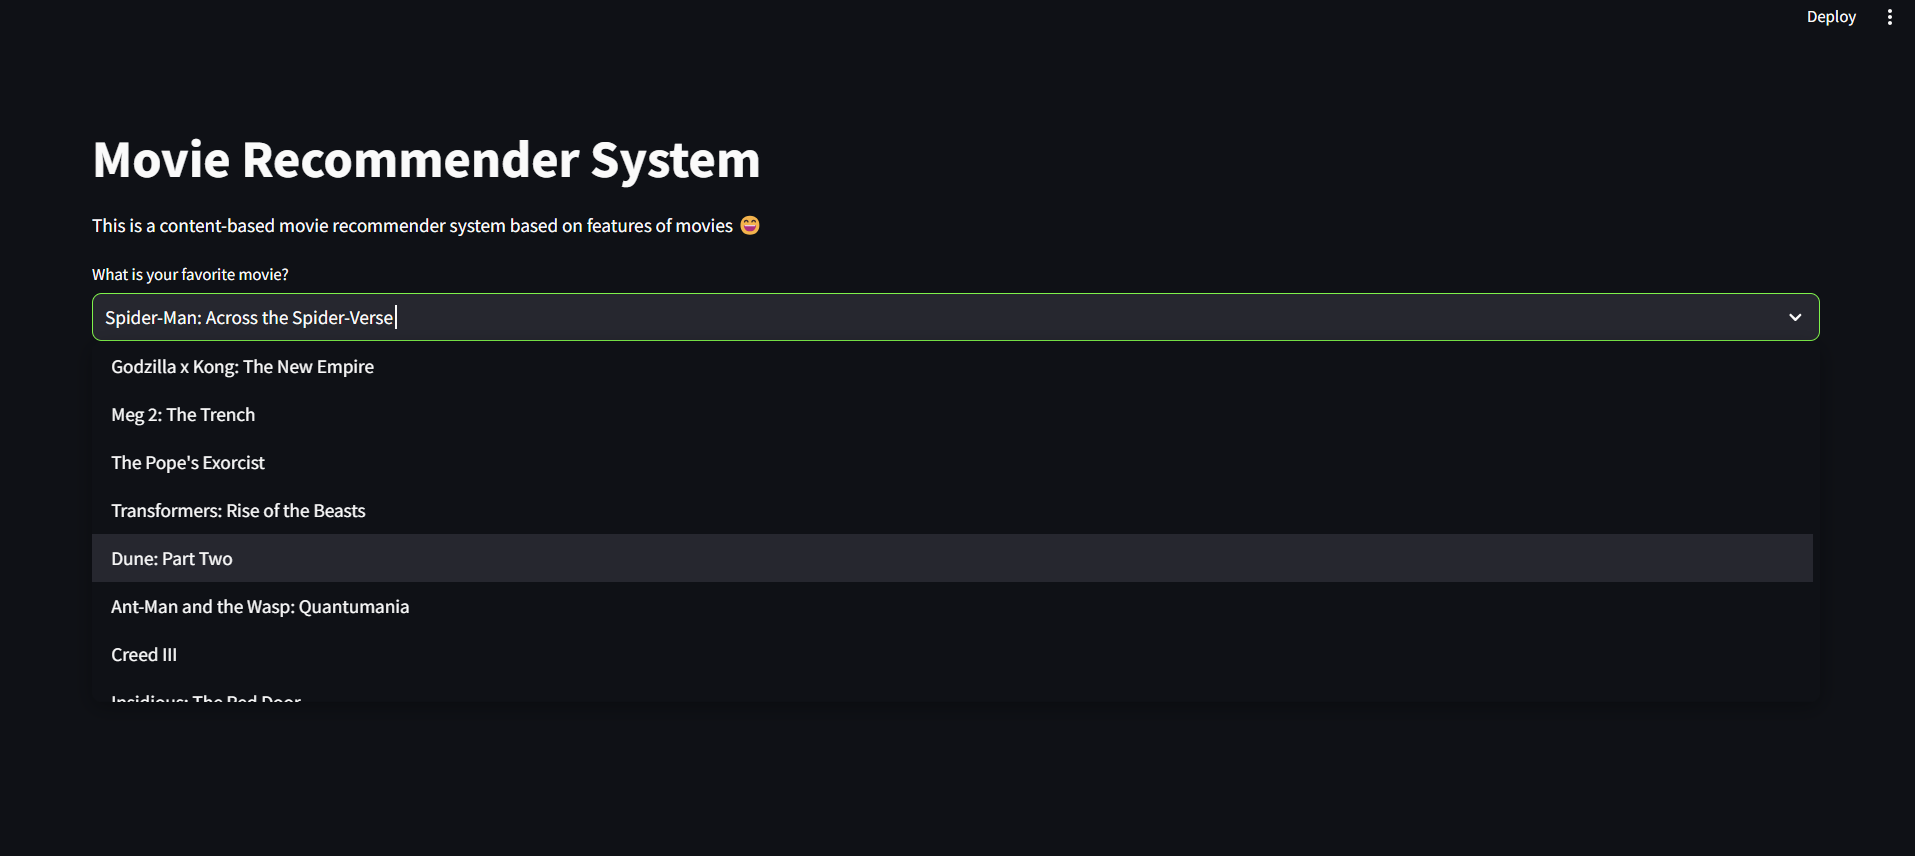

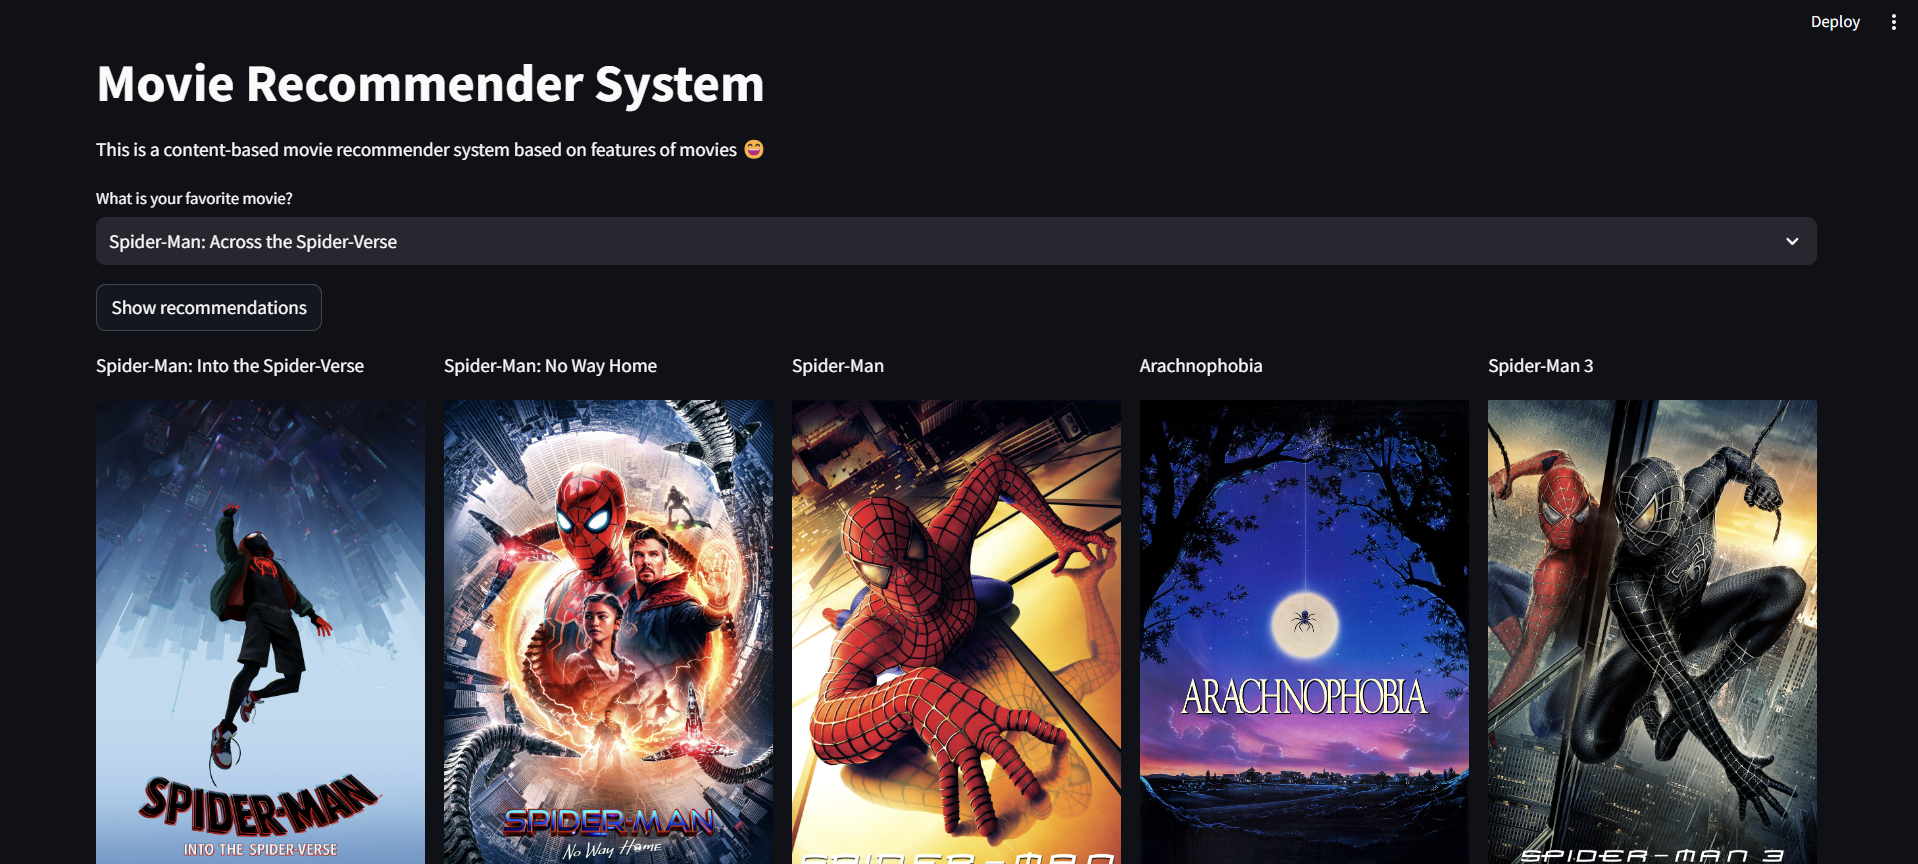

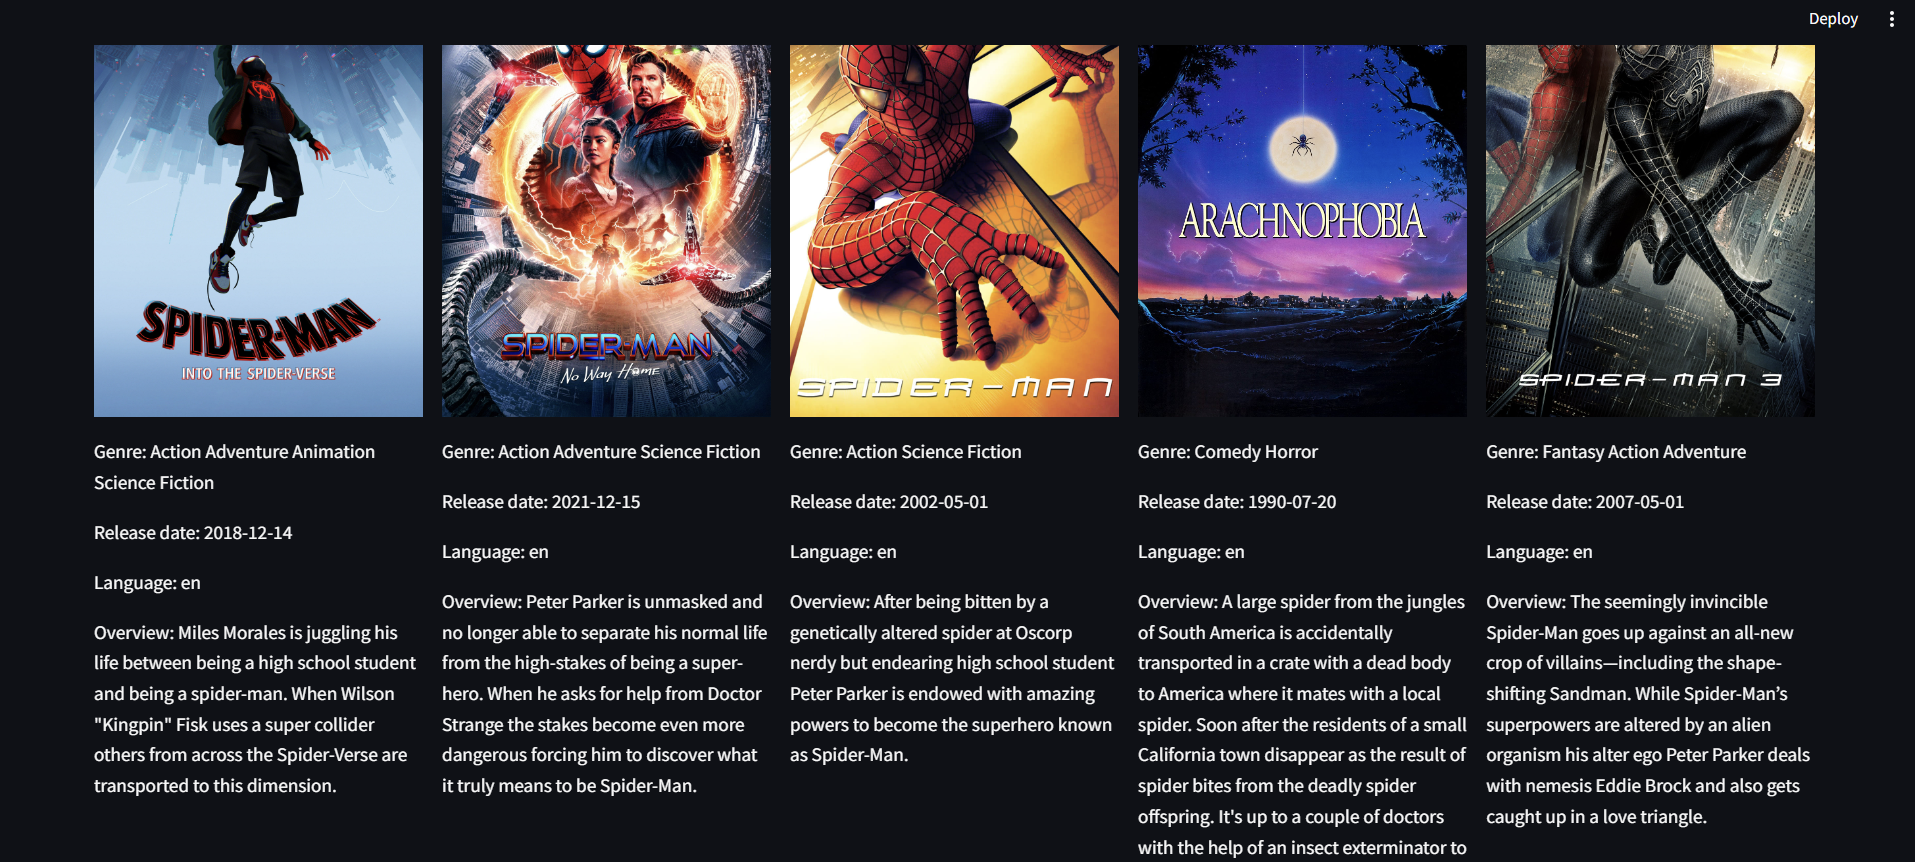

Successfully deployed my recommender model to a web application using streamlit package. The web page shows the titles, posters and brief descriptions of 5 recommended movies similar to a user's selected movie. The image above shows the recommendations for 'Spider-Man: Across the Spider-Verse'.

## 9. Limitation and conclusion
---

### Limitation

My recommendation system seems to have succeeded in providing similar movies to a user's input. However, it revealed limitations in diversifying suggestions due to its reliance on inherent features of the items themselves. Consequently, recommendations tended to converge on similar content, potentially limiting exposure to novel items. Additionally, the model's dependency on keywords could lead to compromised recommendations if certain keywords were undervalued by the algorithm.

### Conclusion

In this project, I built a content-based recommendation system that suggests similar movies. Firstly, I went through data cleaning and analysis process and selected key features such as title, genre and description. Then, I converted these text data into vectors using CountVectorizer tool under Scikit-learn library to convert these cleaned text into numerical features. Lastly, I created a recommender function that generates recommendations based on cosine similarity. Moving forward, I aim to enhance recommendation personalization by integrating users' individual preferences and viewing history. This approach promises to deliver more tailored and enriching suggestions, overcoming the current system's limitations. In conclusion, this project has been an invaluable learning experience, fueling my curiosity to delve deeper into similar projects in the future.